# Operational Intensity Count

In [52]:
import numpy as np
%matplotlib inline
from visualization import *
from util_tsne_exact import *
from sympy import *
init_printing()

In [54]:
bandwidth = 7917e6   # Bytes/s
freq = 2.7e9          # Cycles/s
beta = bandwidth/freq # bytes/cycle
pi = 4                # flops/cycle
data_type = "double"

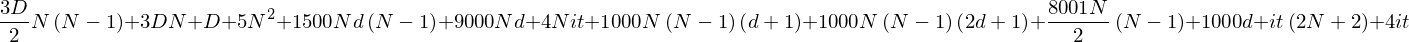

In [55]:
it, D, N, d = symbols('it D N d')
count_measure = ("add", "mult", "div", "exp", "log")
flops = {
    "normalize": {
        "add": 2 * N * D,
        "div": D + N * D
    },
    "compute_pairwise_affinity_perplexity": {
        "compute_squared_euclidean_distance": {
            "add": D * N * (N - 1) / 2 * 2,
            "mult": D * N * (N - 1) / 2
        },
        "binary_search": {
            "add": it * (N + N + 1 + 1),
            "mult": it * (N + 2 * N),
            "div": it * (1 + 1) + N * N,
            "exp": it * N,
            "log": it * (1 + 1)
        }
    },
    "symmetrize_affinities": {
        "add": N * (N - 1) / 2 + N * N,
        "div": N * N
    },
    "early_exageration": {
        "mult": 2 * N * N
    },
    "compute_low_dimensional_affinities": {
        "compute_squared_euclidean_distance": {
            "add": T * d * N * (N - 1) / 2 * 2,
            "mult": T * d * N * (N - 1) / 2
        },
        "compute": {
            "add": T * N * (N - 1) * 2,
            "div": T * N * (N - 1)
        }
    },
    "gradient_computation": {
        "add": T * N * (N - 1) * (1 + 2 * d),
        "mult": T * N * (N - 1) * (1 + d),
        "div": T * N * (N - 1)
    },
    "gradient_update": {
        "add": T * (N * d + N * d * 2),
        "mult": T * N * d * 3
    },
    "normalize_2": {
        "add": T * 2 * N * d,
        "div": T * (d + N * d)
    }
}

flops_by_function_measure = dict(flops)
flops_by_function_measure["compute_pairwise_affinity_perplexity"] = \
    sum_operations_by_measure(flops["compute_pairwise_affinity_perplexity"])
flops_by_function_measure["compute_low_dimensional_affinities"] = \
    sum_operations_by_measure(flops["compute_low_dimensional_affinities"])

total_flops = 0
for func in FUNCTION_NAMES:
    total = 0
    for cname in count_measure:
        if cname in flops_by_function_measure[func]:
            total = total + flops_by_function_measure[func][cname]
    flops_by_function_measure[func]["total"] = total
    total_flops = total_flops + total 

iters = np.loadtxt("../implementations/tsne_exact_optimizations/benchmarking/20170503_121229@-O3 -march=native -std=c++11@double@" + "iters.txt")
        
total_flops

In [56]:
iters = np.loadtxt("../implementations/tsne_exact_optimizations/benchmarking/20170503_121229@-O3 -march=native -std=c++11@double@" + "iters.txt")
n = 200 + np.array(range(iters.shape[0]))*200
iters/n
# we conclude it = 20*N

array([ 20.455     ,  20.67      ,  20.66833333,  20.53      ,
        20.592     ,  20.54833333,  20.50285714,  20.536875  ,
        20.415     ,  20.3965    ,  20.38181818,  20.32958333,
        20.32846154,  20.30678571,  20.253     ])

In [57]:
W = simplify(total_flops.subs(it, 20*N))
print(W)

3*D*N**2/2 + 3*D*N/2 + D + 4500*N**2*d + 12251*N**2/2 + 4500*N*d - 11761*N/2 + 1000*d


#### Read
X: N*D float

##### Temporary Data (at least Read)
High Dim Perplexities N*N
Low Dim Perplexities N*N
gradients N*d
Low Dim Temporary Data 2*N*d

#### Read/Write
Y: N*d float

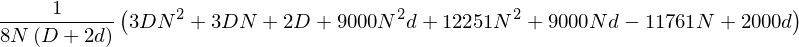

In [61]:
Q1 = 4*(N*D + 2*N*d)
Q2 = 4*(N*D + 2*N*d + 2*N*N + N*d + 2*N*d)
I1 = W/Q1
I2 = W/Q2
simplify(I1)

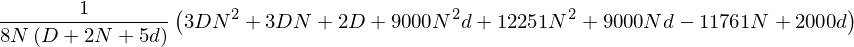

In [62]:
simplify(I2)

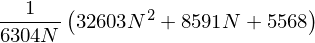

In [59]:
simplify(I1.subs(d, 2).subs(D, 784))

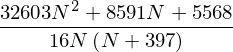

In [50]:
simplify(I2.subs(d, 2).subs(D, 784))